# Assessment of Data and Applying Normalization

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [3]:
originalData = pd.read_csv('abalone.csv')
originalData.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings']
pd.set_option("display.max_rows",10)
originalData

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 1. Is there any missing data?

No, there is no missing data

In [4]:
originalData.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

#The above result says no missing data

Describing the dataset features

In [5]:
originalData.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


Converting the Nomial data type (SEX) feature to numerical type

In [6]:
dummie = pd.get_dummies(originalData.Sex)
nonOrdinalData = pd.concat([originalData,dummie],axis = 'columns')
nonOrdinalData.drop("Sex", axis= 1, inplace = True)
pd.set_option("display.max_columns",None)
nonOrdinalData

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,0,0,1
1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,1,0,0
2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,0,0,1
3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,0,1,0
4,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4171,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,1,0,0
4172,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,0,0,1
4173,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,0,0,1
4174,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,1,0,0


# Q 1.2  Compute the moments or summarization statistics on the data features (mean, median, variance, skew, kurtosis). Do these highlight anything interesting about the different features?

In [7]:
for column in nonOrdinalData.columns:
    print(column)
    print("Mean = %.4f," % nonOrdinalData[column].mean(),
          "Median = %.4f," % nonOrdinalData[column].median(),
          "Variance = %.4f," % nonOrdinalData[column].var(),
          "Skew = %.4f," % nonOrdinalData[column].skew(),
          "Kurtosis = %.4f" % nonOrdinalData[column].kurtosis())
    print("")

Length
Mean = 0.5240, Median = 0.5450, Variance = 0.0144, Skew = -0.6402, Kurtosis = 0.0647

Diameter
Mean = 0.4079, Median = 0.4250, Variance = 0.0099, Skew = -0.6095, Kurtosis = -0.0457

Height
Mean = 0.1395, Median = 0.1400, Variance = 0.0017, Skew = 3.1292, Kurtosis = 76.0460

Whole weight
Mean = 0.8288, Median = 0.7997, Variance = 0.2405, Skew = 0.5306, Kurtosis = -0.0241

Shucked weight
Mean = 0.3594, Median = 0.3360, Variance = 0.0493, Skew = 0.7187, Kurtosis = 0.5944

Viscera weight
Mean = 0.1806, Median = 0.1710, Variance = 0.0120, Skew = 0.5915, Kurtosis = 0.0836

Shell weight
Mean = 0.2389, Median = 0.2340, Variance = 0.0194, Skew = 0.6205, Kurtosis = 0.5314

Rings
Mean = 9.9325, Median = 9.0000, Variance = 10.3916, Skew = 1.1152, Kurtosis = 2.3359

F
Mean = 0.3130, Median = 0.0000, Variance = 0.2151, Skew = 0.8069, Kurtosis = -1.3495

I
Mean = 0.3214, Median = 0.0000, Variance = 0.2181, Skew = 0.7653, Kurtosis = -1.4149

M
Mean = 0.3657, Median = 0.0000, Variance = 0.2320, 

Converting the statistic into the dataframe and ploting the table

In [44]:
mean = nonOrdinalData.mean()
median = nonOrdinalData.median()
variance = nonOrdinalData.var()
skew = nonOrdinalData.skew()
kurtosis = nonOrdinalData.kurtosis()

char_data = pd.DataFrame(data = [mean, median, variance, skew, kurtosis] ,columns = ['F','I','M', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight',  'Rings'], index = ['Mean','Median','Variance','Skew','Kurtosis'])
char_data

,F,I,M,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Mean,0.312979,0.321360,0.365661,0.524009,0.407892,0.139527,0.828818,0.359400,0.180613,0.238852,9.932471
Median,0.000000,0.000000,0.000000,0.545000,0.425000,0.140000,0.799750,0.336000,0.171000,0.234000,9.000000
Variance,0.215075,0.218140,0.232009,0.014425,0.009850,0.001749,0.240515,0.049275,0.012017,0.019380,10.391606
Skew,0.806927,0.765330,0.558070,-0.640240,-0.609457,3.129241,0.530576,0.718724,0.591463,0.620547,1.115157
Kurtosis,-1.349516,-1.414948,-1.689368,0.064698,-0.045675,76.046000,-0.024136,0.594448,0.083574,0.531350,2.335940


From the Above table the Shell weight and Height mean is nearly equal to median which means that the data are equally spaced

Vairance measures the dispersion of data set from its mean, as a result Diameter, height are very much near to its mean

The Height has the skewness of 3.12 which is right skewed and the kurtosis of 76.046 which suggesting that the distribution is leptokurtic i.e. heavier tails

The Diameter has the skewness of -0.609 which makes it a left skewed and the kurtosis of -0.045 which suggest that the distribution is  platykurtic i.e. light tails.

Plotting the Skewness

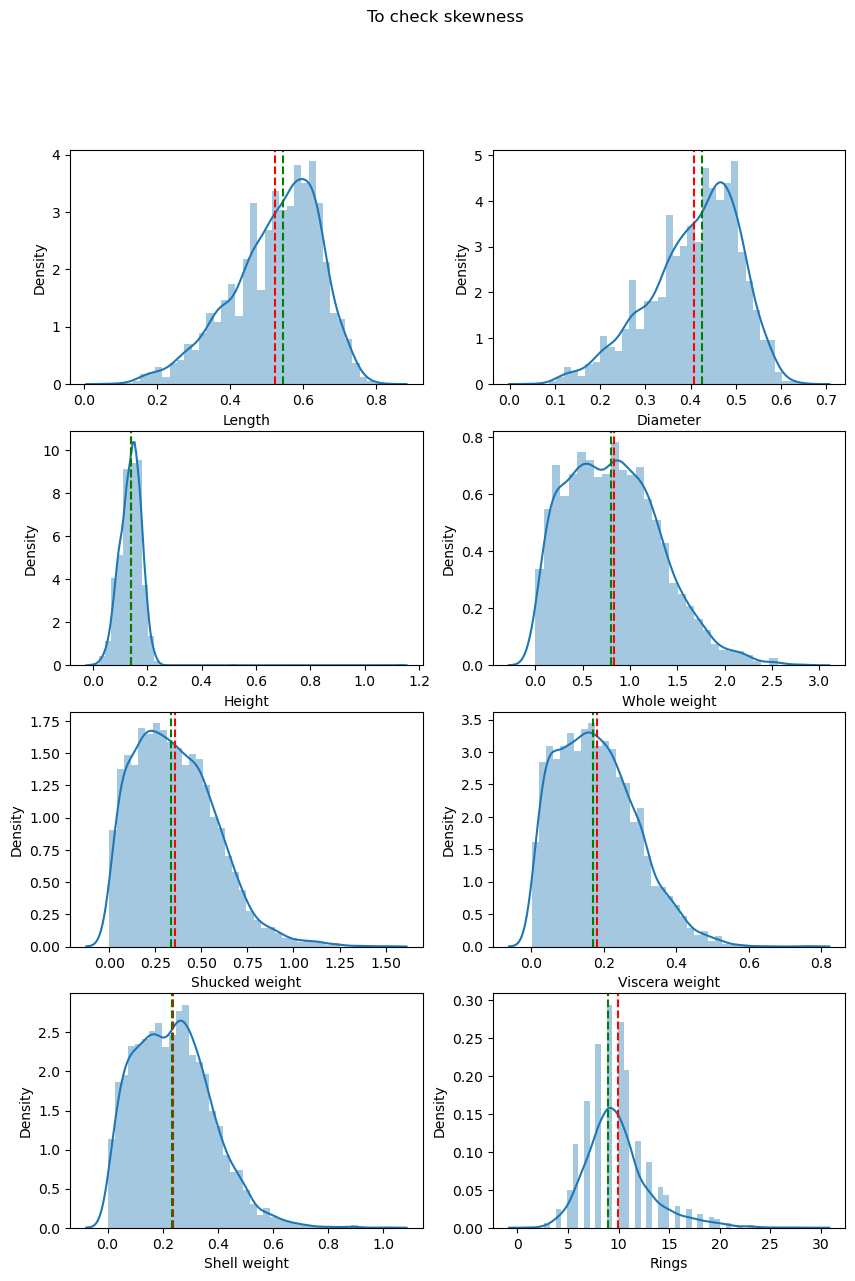

In [45]:
mean_l = nonOrdinalData['Length'].mean()
median_l = nonOrdinalData['Length'].median()

mean_d = nonOrdinalData['Diameter'].mean()
median_d = nonOrdinalData['Diameter'].median()

mean_h = nonOrdinalData['Height'].mean()
median_h = nonOrdinalData['Height'].median()

mean_ww = nonOrdinalData['Whole weight'].mean()
median_ww = nonOrdinalData['Whole weight'].median()

mean_sw = nonOrdinalData['Shucked weight'].mean()
median_sw = nonOrdinalData['Shucked weight'].median()

mean_vw = nonOrdinalData['Viscera weight'].mean()
median_vw = nonOrdinalData['Viscera weight'].median()

mean_shw = nonOrdinalData['Shell weight'].mean()
median_shw = nonOrdinalData['Shell weight'].median()

mean_r = nonOrdinalData['Rings'].mean()
median_r = nonOrdinalData['Rings'].median()



fig, axes = plt.subplots(4,2, figsize=(10,14), sharey=False, dpi=100)
fig.suptitle("To check skewness")
sns.distplot(nonOrdinalData["Length"], ax=axes[0,0], axlabel = 'Length')
axes[0,0].axvline(mean_l, color='r', linestyle='--', label="mean")
axes[0,0].axvline(median_l, color='g', linestyle='--', label="median")

sns.distplot(nonOrdinalData["Diameter"], ax=axes[0,1], axlabel = 'Diameter')
axes[0,1].axvline(mean_d, color='r', linestyle='--', label="mean")
axes[0,1].axvline(median_d, color='g', linestyle='--', label="median")

sns.distplot(nonOrdinalData["Height"], ax=axes[1,0], axlabel = 'Height')
axes[1,0].axvline(mean_h, color='r', linestyle='--', label="mean")
axes[1,0].axvline(median_h, color='g', linestyle='--', label="median")

sns.distplot(nonOrdinalData["Whole weight"], ax=axes[1,1], axlabel = 'Whole weight')
axes[1,1].axvline(mean_ww, color='r', linestyle='--', label="mean")
axes[1,1].axvline(median_ww, color='g', linestyle='--', label="median")

sns.distplot(nonOrdinalData["Shucked weight"], ax=axes[2,0], axlabel = 'Shucked weight')
axes[2,0].axvline(mean_sw, color='r', linestyle='--', label="mean")
axes[2,0].axvline(median_sw, color='g', linestyle='--', label="median")

sns.distplot(nonOrdinalData["Viscera weight"], ax=axes[2,1], axlabel = 'Viscera weight')
axes[2,1].axvline(mean_vw, color='r', linestyle='--', label="mean")
axes[2,1].axvline(median_vw, color='g', linestyle='--', label="median")

sns.distplot(nonOrdinalData["Shell weight"], ax=axes[3,0], axlabel = 'Shell weight')
axes[3,0].axvline(mean_shw, color='r', linestyle='--', label="mean")
axes[3,0].axvline(median_shw, color='g', linestyle='--', label="median")

sns.distplot(nonOrdinalData["Rings"], ax=axes[3,1], axlabel = 'Rings')
axes[3,1].axvline(mean_r, color='r', linestyle='--', label="mean")
axes[3,1].axvline(median_r, color='g', linestyle='--', label="median")

plt.show()

Form the above graph the shell weight and height has equal mean and median

and shucked weight, viscera weight and whole weight has nearly equal mean and median

# Q 1.3  Use a pairsplot (the seaborn library has a nice one, for example) to look at the whole of the datset. Choose a subset, just some features, and show it in your report to highlight some features that seem important.

Making the pair plot of the all the features

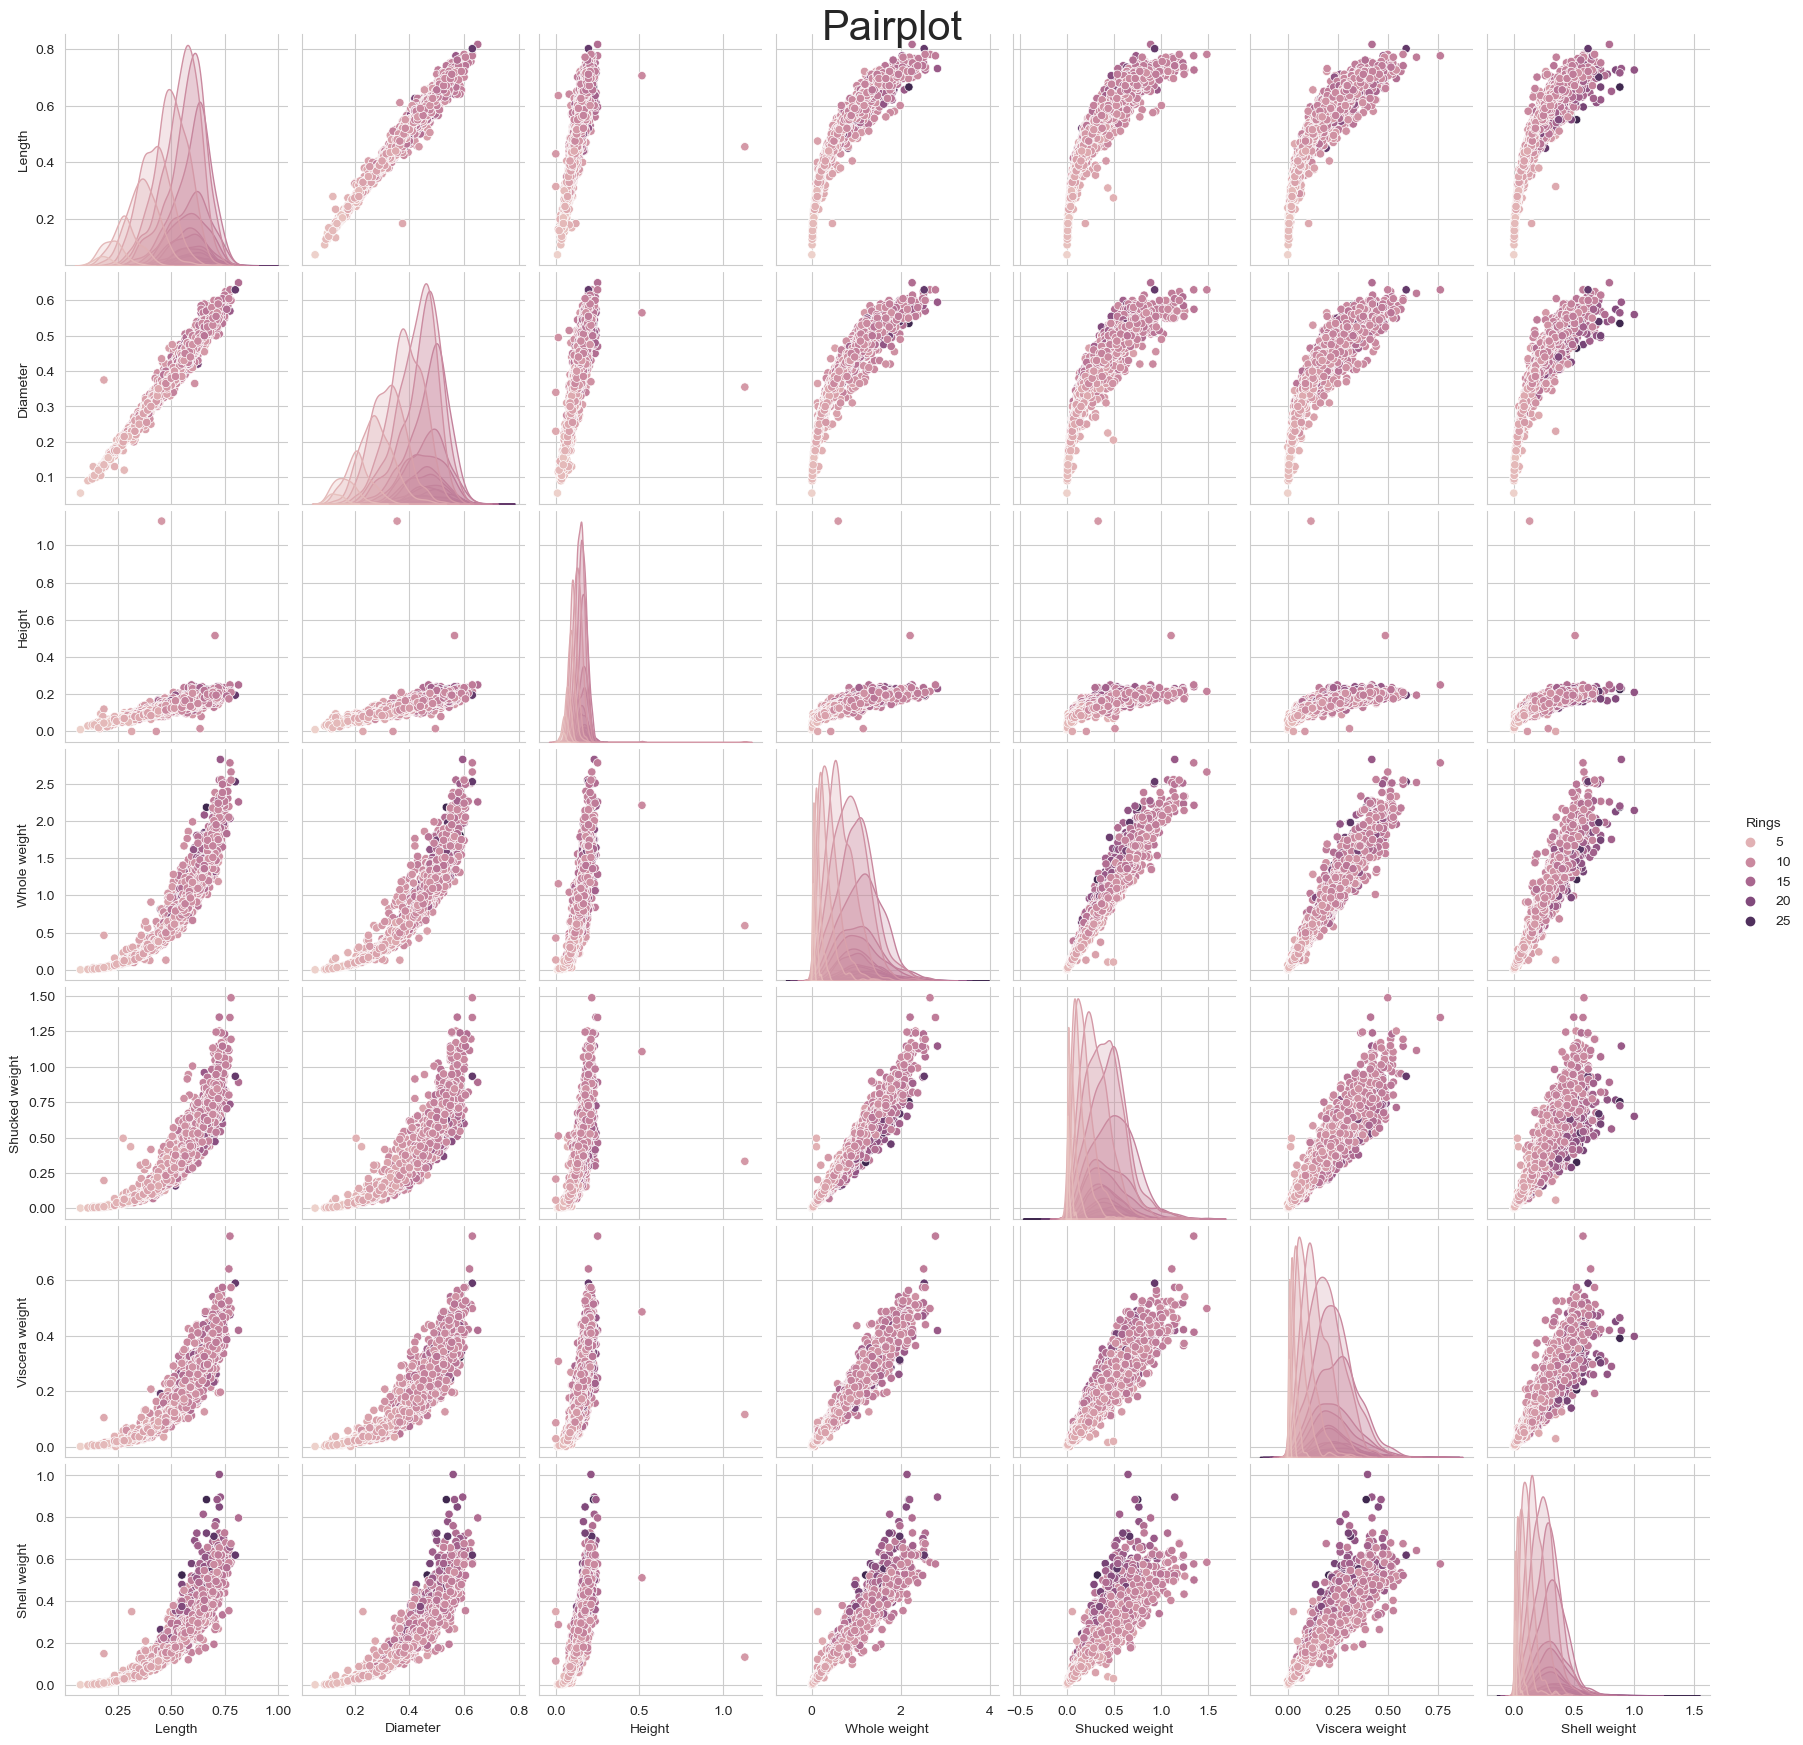

In [79]:
sns.set_style("whitegrid")
pairplot = sns.pairplot(originalData, hue="Rings")
#pairplot = sns.pairplot(originalData)
pairplot.fig.suptitle("Pairplot", y = 1, size=30)
plt.show()

From the above pairplot we can see that the distribution of length and diameter is similar

As can be seen from the graph the 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight' are almost silimar

only the Height has unique distribution

Almost all rings are has some overlap which is challenging task to distinguish

we can clearly see that no pair of features can clearly distinguish between the targets.

However length and diameter && Shucked weight and Viscera weight can separate the target upon reasonable extent

Subset of features highlighting some important distinguish patterns

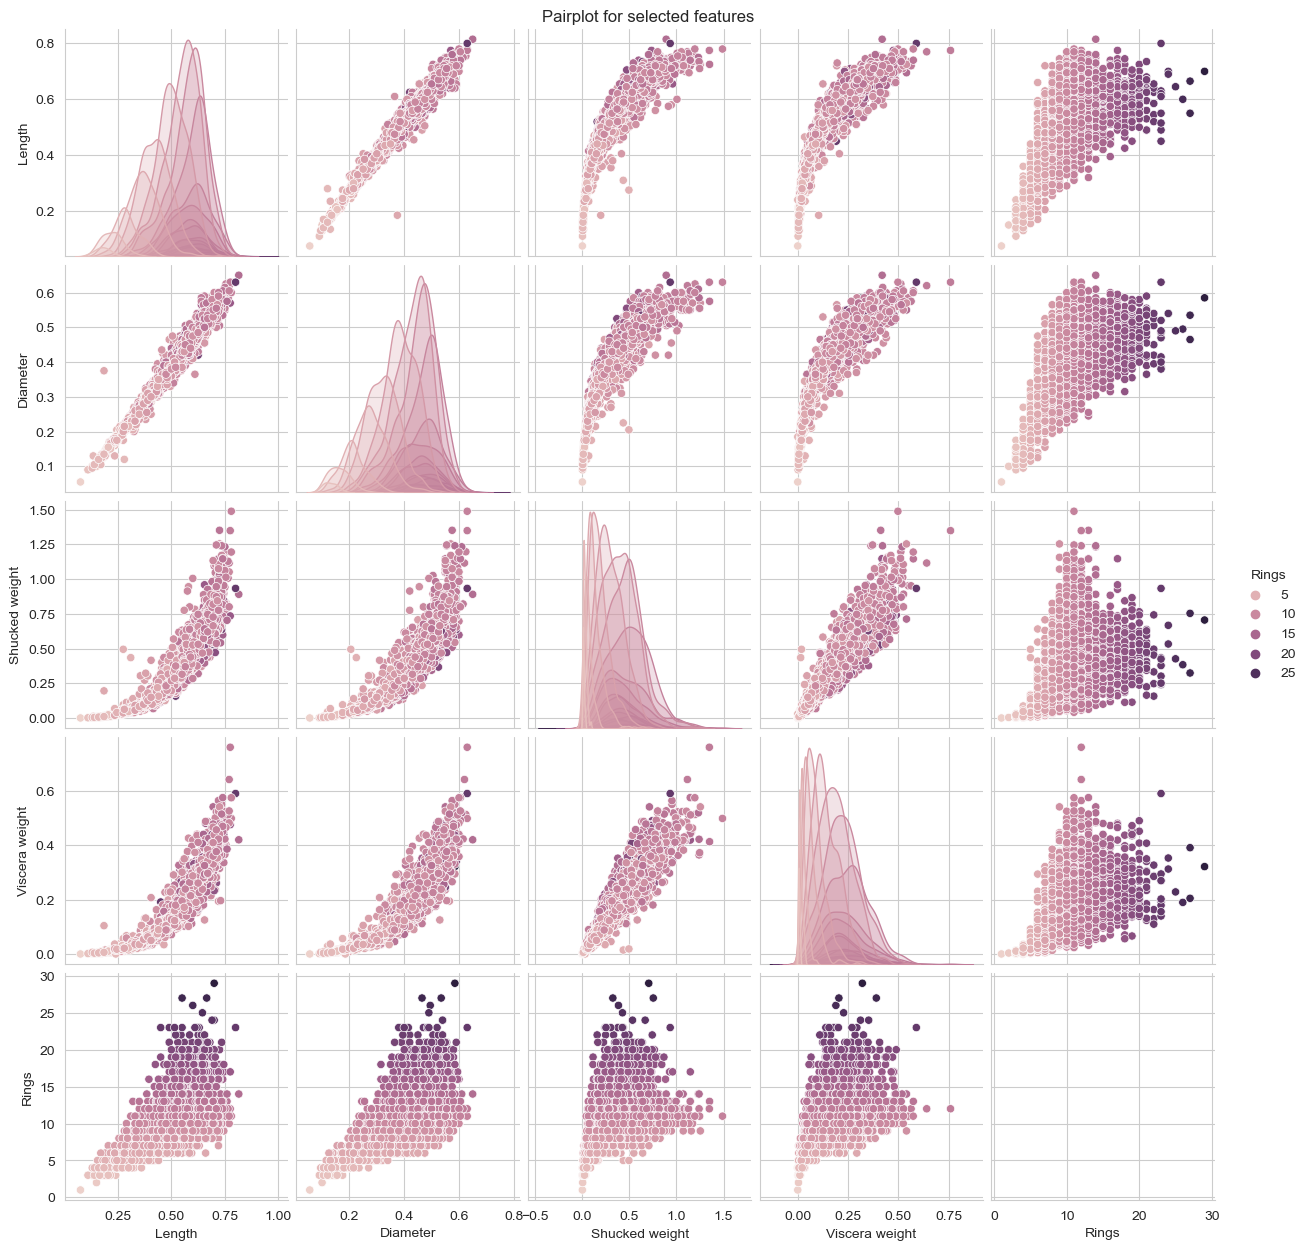

In [81]:
# pairplot on only few pairs
sns.set_style("whitegrid")
selected_pairplot = sns.pairplot(originalData, vars = ["Length", "Diameter", "Shucked weight", "Viscera weight", "Rings"], hue = "Rings")
selected_pairplot.fig.suptitle("Pairplot for selected features", y = 1)
plt.show()

Plotting a Correlation Matrix

In [50]:
#Correlation matrix
correlation_data = originalData.corr()
correlation_data.style.background_gradient(cmap = "coolwarm")

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986813,0.827552,0.925255,0.897905,0.903010,0.897697,0.557123
Diameter,0.986813,1.000000,0.833705,0.925452,0.893159,0.899726,0.905328,0.575005
Height,0.827552,0.833705,1.000000,0.819209,0.774957,0.798293,0.817326,0.558109
Whole weight,0.925255,0.925452,0.819209,1.000000,0.969403,0.966372,0.955351,0.540818
Shucked weight,0.897905,0.893159,0.774957,0.969403,1.000000,0.931956,0.882606,0.421256
Viscera weight,0.903010,0.899726,0.798293,0.966372,0.931956,1.000000,0.907647,0.504274
Shell weight,0.897697,0.905328,0.817326,0.955351,0.882606,0.907647,1.000000,0.628031
Rings,0.557123,0.575005,0.558109,0.540818,0.421256,0.504274,0.628031,1.000000


From the above matrix, we can say that Length and Diameter has highest correlation (0.986)

Rings and Shucked weight has least correlation which is 0.42

Rings has low correlation with all the other features

Apart from the rings the height has the least correlation with all other features

# Q1.4  Is this a balanced dataset? If not, what kind of correction could we apply?

No, Not a balanced Dataset


printing the occurance of the each ring values

In [60]:
balance_testData = originalData["Rings"].value_counts()
pd.set_option("display.max_rows", None)
balance_testData = balance_testData.sort_index()
balance_testData

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    102
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

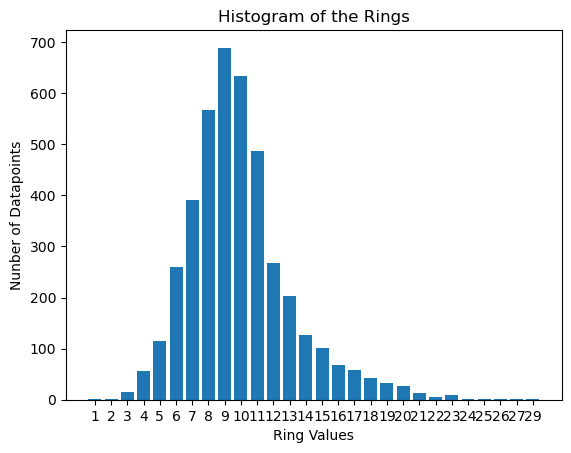

In [65]:
index = balance_testData.index
values = balance_testData.values
plt.bar(range(len(balance_testData)), values, tick_label=index)
plt.xlabel("Ring Values")
plt.ylabel("Nunber of Datapoints")
plt.title("Histogram of the Rings")
plt.show()

From the above histogram the dataset is "Not Balanced" 

In [64]:
print("The dataset balancing ratio is")
for i in balance_testData:
    print(i/max(balance_testData), end = " : ")

The dataset balancing ratio is
0.001451378809869376 : 0.001451378809869376 : 0.02177068214804064 : 0.08272859216255443 : 0.16690856313497823 : 0.37590711175616837 : 0.5674891146589259 : 0.8243831640058055 : 1.0 : 0.9201741654571843 : 0.706821480406386 : 0.3875181422351234 : 0.2946298984034833 : 0.18287373004354138 : 0.14804063860667635 : 0.09724238026124818 : 0.0841799709724238 : 0.06095791001451379 : 0.04644412191582003 : 0.03773584905660377 : 0.020319303338171262 : 0.008708272859216255 : 0.013062409288824383 : 0.002902757619738752 : 0.001451378809869376 : 0.001451378809869376 : 0.002902757619738752 : 0.001451378809869376 : 

Balancing the Dataset

Two approaches to make a balanced dataset out of an imbalanced one are under-sampling and over-sampling.

 Under-sampling
 
Under-sampling balances the dataset by reducing the size of the abundant class. This method is used when quantity of data is sufficient. By keeping all samples in the rare class and randomly selecting an equal number of samples in the abundant class, a balanced new dataset can be retrieved for further modelling.

 Over-sampling
 
On the contrary, oversampling is used when the quantity of data is insufficient. It tries to balance dataset by increasing the size of rare samples. Rather than getting rid of abundant samples, new rare samples are generated by using e.g. repetition, bootstrapping or SMOTE (Synthetic Minority Over-Sampling Technique) 

Performing the Under-sampling

In [62]:
samplingData = nonOrdinalData.groupby("Rings")
samplingData = samplingData.apply(lambda x: x.sample(samplingData.size().min()))
samplingData

,,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
Rings,,,,,,,,,,,,
1,235,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1,0,1,0
2,718,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2,0,1,0
3,893,0.240,0.175,0.065,0.0665,0.0310,0.0135,0.0170,3,0,1,0
4,1429,0.230,0.165,0.060,0.0515,0.0190,0.0145,0.0360,4,0,1,0
5,2548,0.280,0.210,0.055,0.1060,0.0415,0.0265,0.0310,5,0,1,0
6,1452,0.470,0.350,0.125,0.4315,0.1900,0.1165,0.1175,6,0,1,0
7,3153,0.540,0.410,0.130,0.5600,0.2375,0.1065,0.1750,7,0,0,1
8,1573,0.480,0.355,0.160,0.4640,0.2210,0.1060,0.2390,8,0,0,1
9,1565,0.465,0.370,0.120,0.4365,0.1880,0.0815,0.1470,9,0,1,0


# Q 1.5 Normalize the data using z-score normalization as a preprocessing step.

Z-Score Normalization :

General formula is used to calculate the Z-Score Normalization i.e. (Value-Mean/Std)
It takes the points roughly in the same scale on both features and handels the squashing.
Handels the outliers more effectively as compared to other normalizaton methods.

In [47]:
normData = (nonOrdinalData - nonOrdinalData.mean())/nonOrdinalData.std()
pd.set_option("display.max_rows",10)
normData

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,-1.448834,-1.439720,-1.184110,-1.230197,-1.170827,-1.205183,-1.212909,-0.909688,-0.674871,-0.688057,1.316951
1,0.049886,0.122000,-0.108235,-0.309564,-0.463555,-0.356801,-0.207252,-0.289264,1.481411,-0.688057,-0.759148
2,-0.699474,-0.432158,-0.347318,-0.637852,-0.648256,-0.607666,-0.602332,0.020948,-0.674871,-0.688057,1.316951
3,-1.615358,-1.540476,-1.423194,-1.271998,-1.215876,-1.287284,-1.320658,-0.909688,-0.674871,1.453020,-0.759148
4,-0.824367,-1.087073,-1.064569,-0.973276,-0.983873,-0.940633,-0.853746,-0.599476,-0.674871,1.453020,-0.759148
...,...,...,...,...,...,...,...,...,...,...,...
4171,0.341303,0.424269,0.609016,0.118637,0.047753,0.532632,0.072895,0.331160,1.481411,-0.688057,-0.759148
4172,0.549459,0.323513,-0.108235,0.279722,0.358592,0.309133,0.155502,0.020948,-0.674871,-0.688057,1.316951
4173,0.632721,0.676159,1.565350,0.707924,0.748268,0.975067,0.496707,-0.289264,-0.674871,-0.688057,1.316951
4174,0.840876,0.776915,0.250391,0.541741,0.773045,0.733324,0.410508,0.020948,1.481411,-0.688057,-0.759148


In [51]:
normData.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
count,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03,4.176000e+03
mean,-4.590517e-15,-1.429354e-14,2.448823e-14,-5.031629e-15,4.527455e-15,-2.487314e-15,7.256860e-16,-1.627583e-15,-2.859037e-16,7.438175e-16,3.930976e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.738544e+00,-3.555599e+00,-3.335862e+00,-1.685925e+00,-1.614561e+00,-1.643057e+00,-1.704962e+00,-2.770960e+00,-6.748706e-01,-6.880569e-01,-7.591481e-01
25%,-6.162119e-01,-5.832927e-01,-5.864015e-01,-7.897613e-01,-7.811515e-01,-7.958156e-01,-7.819132e-01,-5.994759e-01,-6.748706e-01,-6.880569e-01,-7.591481e-01
50%,1.747788e-01,1.723784e-01,1.130723e-02,-5.927025e-02,-1.054141e-01,-8.769046e-02,-3.485412e-02,-2.892638e-01,-6.748706e-01,-6.880569e-01,-7.591481e-01
75%,7.576141e-01,7.265372e-01,6.090160e-01,6.615353e-01,6.424020e-01,6.603451e-01,6.475556e-01,3.311603e-01,1.481411e+00,1.453020e+00,1.316951e+00
max,2.422858e+00,2.439392e+00,2.368057e+01,4.071343e+00,5.084249e+00,5.285394e+00,5.503440e+00,5.914977e+00,1.481411e+00,1.453020e+00,1.316951e+00


In [52]:
def zScoreNorm(data):
    df = data.copy()
    for column in df.columns:
        df[column] = (df[column] - df[column].mean())/df[column].std()
    return df
normData = zScoreNorm(nonOrdinalData)
normData

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,F,I,M
0,-1.448834,-1.439720,-1.184110,-1.230197,-1.170827,-1.205183,-1.212909,-0.909688,-0.674871,-0.688057,1.316951
1,0.049886,0.122000,-0.108235,-0.309564,-0.463555,-0.356801,-0.207252,-0.289264,1.481411,-0.688057,-0.759148
2,-0.699474,-0.432158,-0.347318,-0.637852,-0.648256,-0.607666,-0.602332,0.020948,-0.674871,-0.688057,1.316951
3,-1.615358,-1.540476,-1.423194,-1.271998,-1.215876,-1.287284,-1.320658,-0.909688,-0.674871,1.453020,-0.759148
4,-0.824367,-1.087073,-1.064569,-0.973276,-0.983873,-0.940633,-0.853746,-0.599476,-0.674871,1.453020,-0.759148
...,...,...,...,...,...,...,...,...,...,...,...
4171,0.341303,0.424269,0.609016,0.118637,0.047753,0.532632,0.072895,0.331160,1.481411,-0.688057,-0.759148
4172,0.549459,0.323513,-0.108235,0.279722,0.358592,0.309133,0.155502,0.020948,-0.674871,-0.688057,1.316951
4173,0.632721,0.676159,1.565350,0.707924,0.748268,0.975067,0.496707,-0.289264,-0.674871,-0.688057,1.316951
4174,0.840876,0.776915,0.250391,0.541741,0.773045,0.733324,0.410508,0.020948,1.481411,-0.688057,-0.759148
